# Lab 2: Classification
## AirBnB Listings for Los Angeles Area
### Jason McDonald, Miguel Bonilla, Zachary Bunn

**Table of Contents**

- [Data Preparation: Part 1](#Data-Preparation:-Part-1)
    - [Data Types and Descriptions](#Data-Types-and-Descriptions)
    - [Data Wrangling](#Data-Wrangling)
    - [Label and One-Hot Encoding](#Label-and-One-Hot-encoding)
    - [Scaling numerical varialbes](#Scaling-numerical-variables)
- [Data Preparation: Part 2](#Data-Preparation:-Part-2)
- [Modeling and Evaulation 1](#Modeling-and-Evaluation-1)
- [Modeling and Evaulation 2](#Modeling-and-Evaluation-2)
- [Modeling and Evaulation 3](#Modeling-and-Evaluation-3)
    - [Task 1: Regression](#Task-1:-Regression)
        - [Elastic Net](#Elastic-Net)
        - [Lasso Regression](#Lasso-Regression)
        - [Random Forest Regressor](#Random-Forest-Regressor)
        - [SVR](#SVR)
        - [SGD Regression](#SGD-Regression)
    - [Task 2: Classification](#Task-2:-Classification)
        - [Random Forest](#Random-Forest)
        - [NaiveBayes](#NaiveBayes)
        - [SVM](#SVM)
        - [Logistic Regression](#Logistic-Regression)
        - [KNN](#KNN)
- [Modeling and Evaulation 4](#Modeling-and-Evaluation-4)
- [Modeling and Evaulation 5](#Modeling-and-Evaluation-5)
- [Modeling and Evaulation 6](#Modeling-and-Evaluation-6)
- [Deployment](#Deployment)
- [Exceptional Work](#Exceptional-Work)

### Data Preparation: Part 1
Rubric (10 pts): Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

#### Data Wrangling
First of all, we will clean up the data, imputing missing values as done from previous work

#### Data Types and Descriptions

| Field | Type | Description | Scale |
| :--- | :---: | :---: | :--- |
| id | integer | Airbnb's unique identifier for the listing | 42041 Unique Identifiers|
| name | text | Name of the listing | NA|
| host_id | integer | Airbnb's unique identifier for the host/user | Less than id since a host can have multiple listings|
| host_name | text | Name of the host. Usually just the first name(s).| NA|
| host_since | date | The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.| NA|
| host_location | text | The host's self reported location| NA|
| host_is_superhost | boolean | If host has Superhost classification. These are highly rated hosts.| NA|
| host_total_listings_count | text | The number of listings the host has (per Airbnb calculations)| 0 to 3322|
| host_identity_verified | boolean | The Host has verified their identity| NA| 
| neighbourhood_cleansed | text | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.| NA|
| latitude | numeric | Uses the World Geodetic System (WGS84) projection for latitude and longitude. | Any latitudinal value|
| longitude | numeric | Uses the World Geodetic System (WGS84) projection for latitude and longitude. | Any longitudinal value|
| property_type | text | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field | NA|
|room_type | text | [Entire home/apt\Private room\Shared room\Hotel] All homes are grouped into the following three room types: Entire place, Private access to the entire home, Private rooms - Your own room in a shared house, Shared rooms - shared bedrooms and common rooms with other guests. | 5 Types of Rooms|
| accommodates | integer | The maximum capacity of the listing | 0 to 16 guests|
| bathrooms_text | string | The number of bathrooms in the listing. On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used. | anywhere from 0 - 8 counting half-baths|
|bedrooms | integer | The number of bedrooms | 0 to 24 bedrooms|
| beds | integer | The number of bed(s) | 0 - 34 beds|
| amenities | json | Array of added features that the host wanted to include as a listed benefit| Differs from listing to listing|
| price | currency | daily price in local currency | Avg of 0 to 25,000 dollars with an outlier at 100k|
| has_availability | boolean [t=true; f=false] | if the listing is available or not | NA|
| calendar_last_scraped | date | Last calendar date the data was scraped | NA|
| number_of_reviews | integer | The number of reviews the listing has | 0 to 1512|
| review_scores_rating | float | Score of property | 0.0 to 5.0 avgeraged scale|
| instant_bookable | boolean[t=true; f=false] | Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing. | NA|


In [1]:
# import packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

#df = pd.read_csv("https://media.githubusercontent.com/media/boneeyah/DS7331_Group/main/Data_Files/airbnb_los_angeles.csv")
df = pd.read_csv("Data_Files/airbnb_los_angeles.csv")

In [56]:
#define a function that will be used to print out performance of the models
def plotMetrics(score, cellTitle):
    fig = ff.create_table(score, height_constant=20, colorscale=[[0, '#00A699'], [.5, '#a9a9a9'], [1, '#ffffff']])

    Metrics = ['Mean Accuracy', 'Mean Sensitivity', 'Mean Specificity']
    MeanScores = [score['accuracy'].mean(), score['sensitivity'].mean(), score['specificity'].mean()]

    fig.add_trace(go.Bar(x=Metrics, y=MeanScores, xaxis='x2', yaxis='y2', marker = dict(color='#FC642D'), width=.25))
    fig.update_layout(title_text=cellTitle,
                        height = 800, margin = {'t':75, 'l':50}, yaxis = {'domain': [0, .45]}, xaxis2 = {'anchor': 'y2'}, 
                        yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Score'})
    return fig

In [2]:
# Removing variables which will not be useful for the classification analysis
for col in [
    'listing_url','scrape_id','last_scraped','description','neighborhood_overview','picture_url','host_url','host_about','host_response_time','host_response_rate','host_acceptance_rate',
    'host_thumbnail_url','host_picture_url','host_verifications','host_has_profile_pic','bathroom_text','host_listings_count','host_neighbourhood','bathrooms','minimum_minimum_nights',
    'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','availability_30','availability_60',
    'availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','review_scores_accuracy','review_scores_communication','review_scores_cleanliness',
    'review_scores_checkin','review_scores_value','review_scores_location','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms','reviews_per_month','neighbourhood','neighbourhood_group_cleansed', 'first_review','last_review','minimum_nights','maximum_nights','license','host_total_listings_count'
]:
    if col in df:
        del df[col]

In [3]:
# remove nulls
df = df[~df.review_scores_rating.isnull() & ~df.bathrooms_text.isnull() & ~df.host_since.isnull() & ~df.host_location.isnull()]

## getting property type from string
types = ['Private room', 'Entire', 'Room in hotel','Room','Shared room']
pat = '|'.join(r"\b{}\b".format(x) for x in types)

df['property_type']= df['property_type'].str.extract('('+ pat + ')', expand = False)
df['property_type'] = (df.property_type.
                       fillna(value = 'other').
                       replace(['Entire','Room in hotel'],['Entire unit','Hotel room']))
df['property_type'].value_counts()

Entire unit     22767
Private room     8081
Shared room       510
Room              401
other             298
Hotel room        272
Name: property_type, dtype: int64

In [4]:
# impute values based on median
df['beds'] = df[['accommodates','beds']].groupby(by = 'accommodates').transform(lambda grp: grp.fillna(grp.median()))
df_grouped = df.groupby(by = ['property_type','beds'])
df_imputed = df_grouped[['beds','bedrooms']].transform(lambda grp: grp.fillna(grp.median()))

index = df_imputed[df_imputed.bedrooms.isnull()].index
df = df.drop(index= index)

df['imputed']=df_imputed[['bedrooms']]

# replace 'bedrooms' column with imputed column and deleting the duplicated column
df['bedrooms'] = df['imputed']
del df['imputed']

In [5]:
## fixing variable types
df['host_since'] = pd.to_datetime(df.host_since)
df['price'] = df['price'].replace('[\$,]','',regex = True).astype(float)
df['bathrooms_text'] = df['bathrooms_text'].replace(['Half-bath', 'Shared half-bath', 'Private half-bath'],['0.5 bath','0.5 shared bath', '0.5 private bath'])
df_bathrooms = df['bathrooms_text'].str.split(n=1, expand=True).rename(columns = {0:'bathroom_number',1:'bathroom_type'})
df_bathrooms['bathroom_type'] = df_bathrooms.bathroom_type.fillna(value = 'bath')
df_bathrooms['bathroom_type'] = df_bathrooms['bathroom_type'].replace(['baths','shared baths'],['bath','shared bath'])
df_bathrooms['bathroom_number'] = df_bathrooms['bathroom_number'].astype('float')
df.insert(15, 'bathroom_number',df_bathrooms['bathroom_number'])
df.insert(16, 'bathroom_type', df_bathrooms['bathroom_type'])
del df['bathrooms_text']

In [6]:
### filter out price outliers
df = df[(df.beds<10) & (df.price<750)]
df = df.reset_index(drop=True)

In [7]:
# breakdown of categorical variables with number of levels (unique)
df.iloc[:,[1,3,5,6,7,8,11,12,15,18,20,23]].describe().T

,count,unique,top,freq
name,30580,29942,Boutique Hostel,46
host_name,30580,6604,David,249
host_location,30580,980,"Los Angeles, California, United States",10613
host_is_superhost,30580,2,f,20236
host_identity_verified,30580,2,t,26080
neighbourhood_cleansed,30580,302,Long Beach,1163
property_type,30580,6,Entire unit,21090
room_type,30580,4,Entire home/apt,21433
bathroom_type,30580,3,bath,22738
amenities,30580,28937,"[""Hangers"", ""First aid kit"", ""Heating"", ""Fire ...",40


This table shows the number of unique levels for categorical variables in our dataset, as well as the most common level of each variable along with its frequency count. From this table, we can see that about 1/3 of listings (10613/30580) correspond to a host who has Superhost status. Additionally the table shows that amenities has 28937 unique levels, given the way these are listed for each listing, a decission was made to drop the variable for this project.

#### Label and One-Hot encoding
To be able to use categorical variables when fitting our models, we will first encode these variables using LabelEncoder and OneHotEncoder, which convert variables into categorical variables represented by binary values of 0 and 1. LabelEncoder can be used to convert binary categories into binary values of 0 and 1 for each level of the original variable. OneHotEncoder can be used to covert variables with more than two categorical variables, by creating n-1 columns (where n corresponds to the number of levels in a category).

In [8]:
# Model will focus on classifying superhost status
# since we're encoding with binary response, we can use labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['host_is_superhost'] = label_encoder.fit_transform(df['host_is_superhost'])
print('host_is_superhost')
df.host_is_superhost.value_counts()

host_is_superhost


0    20236
1    10344
Name: host_is_superhost, dtype: int64

The value of 0 corresponds to the status of 'f' of the original variable, a quick check shows that the value matches that which was previously found (20236 for 'f').

In [9]:
## encoding binary categorical variables
# encode identity verified
df['host_identity_verified'] = label_encoder.fit_transform(df['host_identity_verified'])
print('host_identity_verified')
print(df.host_identity_verified.value_counts())

#encode has_availability
df['has_availability'] = label_encoder.fit_transform(df['has_availability'])
print('has_availability')
print(df.has_availability.value_counts())

#encode instant bookable
df['instant_bookable'] = label_encoder.fit_transform(df['instant_bookable'])
print('instant_bookable')
print(df.instant_bookable.value_counts())

host_identity_verified
1    26080
0     4500
Name: host_identity_verified, dtype: int64
has_availability
1    28785
0     1795
Name: has_availability, dtype: int64
instant_bookable
0    19767
1    10813
Name: instant_bookable, dtype: int64


In [10]:
### new feature host_is_local, from host_location. Binary variable of whether host lives in greater LA area or not.
#los_angeles = pd.read_csv('Data_Files/LosAngelesNeighborhoods.csv')
los_angeles = pd.read_csv('https://raw.githubusercontent.com/boneeyah/DS7331_Group/main/Data_Files/LosAngelesNeighborhoods.csv')
los_angeles = los_angeles.iloc[:,0].tolist()

pattern = '|'.join(los_angeles)
df['host_is_local'] = df['host_location'].str.contains(pattern)

df['host_is_local'] = label_encoder.fit_transform(df['host_is_local'])
print('host_is_local')
df.host_is_local.value_counts()

host_is_local


0    19056
1    11524
Name: host_is_local, dtype: int64

With the newly created variable host_is_local replacing host_location, we now have a variable with 2 levels, as opposed to the original with over 900 categories.

To convert host_since from datetime to a useable format, we made the decission to create a new variable, host_for, corresponding to the number of months since the host first listed properties on AirBnB. This was accomplished by subtracting the host_since date from the date on which the data was pulled from AirBnB (06-06-2022).

In [11]:
## new feature host_for, a numerical variable that corresponds to length in months since becoming host
## data is from June 6 2022, 06-06-2022
end_date = pd.to_datetime('06-06-2022', format= "%m-%d-%Y")
df['host_for'] = (end_date-df.host_since)/np.timedelta64(1,'M')

df = df.drop(columns= ['host_location', 'host_since']) #drop old host_location and host_since columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30580 non-null  int64  
 1   name                            30580 non-null  object 
 2   host_id                         30580 non-null  int64  
 3   host_name                       30580 non-null  object 
 4   host_is_superhost               30580 non-null  int64  
 5   host_identity_verified          30580 non-null  int64  
 6   neighbourhood_cleansed          30580 non-null  object 
 7   latitude                        30580 non-null  float64
 8   longitude                       30580 non-null  float64
 9   property_type                   30580 non-null  object 
 10  room_type                       30580 non-null  object 
 11  accommodates                    30580 non-null  int64  
 12  bathroom_number                 

This table shows the remaining variables which need to be One-Hot Encoded (neighbourhood_cleansed, property_type, room_type, bathroom_type) or dropped since they won't be useful for our modeling (name, host_name, amenities, id, host_id.

In [12]:
# One Hot Encoding other categorical variables as a non-sparse dataframe
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

df_temp = df[['id','neighbourhood_cleansed','property_type', 'room_type', 'bathroom_type']] # to get only the cat variables


In [13]:
ohe = OneHotEncoder(drop='first',sparse=True)
feature_arr = ohe.fit_transform(df_temp[['neighbourhood_cleansed','property_type', 'room_type', 'bathroom_type']])
feature_labels = ohe.get_feature_names_out()

#create dataframe with features
df_temp = pd.DataFrame.sparse.from_spmatrix(feature_arr,columns=feature_labels)

In [14]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Columns: 311 entries, neighbourhood_cleansed_Adams-Normandie to bathroom_type_shared bath
dtypes: Sparse[float64, 0](311)
memory usage: 668.7 KB


In [15]:
# drop original columns and join with new onehotencoded columns
df = df.drop(columns = ['neighbourhood_cleansed','property_type', 'room_type', 'bathroom_type','amenities','name','host_name','id','host_id','latitude','longitude']).join(df_temp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Columns: 325 entries, host_is_superhost to bathroom_type_shared bath
dtypes: Sparse[float64, 0](311), float64(6), int64(8)
memory usage: 3.9 MB


#### Scaling numerical variables
We will rescale our predictors using StandardScaler to ensure all variables are on the same scale so that variable importance is not influenced by the range of values of a variable

In [16]:
from sklearn.preprocessing import StandardScaler

y_reg = df.loc[:,df.columns == 'price'] ### saving original price prior to scaling for regression modeling 
num_columns = ['accommodates','bathroom_number','bedrooms','beds','price','number_of_reviews','review_scores_rating','calculated_host_listings_count','host_for']
scaled = df[num_columns]
scaled = pd.DataFrame(StandardScaler().fit_transform(scaled),columns=scaled.columns)

df[num_columns] = scaled[num_columns]

In [17]:
### clean up temporary files
del df_temp, feature_arr, feature_labels, scaled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Columns: 325 entries, host_is_superhost to bathroom_type_shared bath
dtypes: Sparse[float64, 0](311), float64(9), int64(5)
memory usage: 3.9 MB


In [18]:
df[num_columns].describe()

,accommodates,bathroom_number,bedrooms,beds,price,number_of_reviews,review_scores_rating,calculated_host_listings_count,host_for
count,3.058000e+04,3.058000e+04,3.058000e+04,3.058000e+04,3.058000e+04,3.058000e+04,3.058000e+04,3.058000e+04,3.058000e+04
mean,-8.922446e-17,-5.204760e-17,4.461223e-17,2.974149e-17,2.974149e-17,-1.115306e-17,-7.435372e-18,2.230612e-17,-1.487074e-17
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-1.107019e+00,-1.783036e+00,-6.610494e-01,-7.509706e-01,-1.243972e+00,-5.770197e-01,-7.623051e+00,-2.716875e-01,-2.069410e+00
25%,-7.045577e-01,-5.371434e-01,-6.610494e-01,-7.509706e-01,-7.143722e-01,-5.400700e-01,-4.401467e-02,-2.716875e-01,-7.273150e-01
50%,-3.020962e-01,-5.371434e-01,-6.610494e-01,-5.794827e-02,-3.259995e-01,-4.045877e-01,2.805693e-01,-2.495258e-01,6.657625e-02
75%,5.028269e-01,7.087490e-01,4.115008e-01,6.350741e-01,4.154395e-01,8.807517e-02,4.915489e-01,-1.387172e-01,7.201097e-01
max,4.929904e+00,1.254473e+01,6.846802e+00,4.793208e+00,3.974347e+00,1.803332e+01,4.915489e-01,1.149618e+01,2.918804e+00


## Data Preparation: Part 2
Rubric  (5 pts): Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [19]:
## complete column information for the 325 columns in our dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Data columns (total 325 columns):
 #    Column                                                        Dtype             
---   ------                                                        -----             
 0    host_is_superhost                                             int64             
 1    host_identity_verified                                        int64             
 2    accommodates                                                  float64           
 3    bathroom_number                                               float64           
 4    bedrooms                                                      float64           
 5    beds                                                          float64           
 6    price                                                         float64           
 7    has_availability                                              int64             
 8    number_of_revi

variables:

- host_is_superhost - categorical variable of whether host is a super host (1) or not (0) (label encoded)
- host_identity_verified - categorical variable of whether host identifity has been verified (1) or not (0) (label encoded)
- neighbourhood_cleansed - neighborhorhood on which the listing is located at (One-Hot encoded)
- property_type - category type of listed property (one hot encoded)
- room_type - category type of room(s) of listed property (one hot encoded)
- accommodates - numerical feature of maximum number of guests that can stay at a listing
- bathroom_number - new feature (from bathroom text), for number of bathrooms present at a listing
- bathroom_type - new feature (from bathroom text) for category type of bathroom(s) at a listing (one hot encoded)
- bedrooms - numerical feature of number of bedrooms on the listed property
- beds - numerical variable of number of beds on the listed property
- price - the average daily rate to rent the listed property
- has_availability - categorical variable of whether property is available (1) or not (0) (label encoded)
- number_of_reviews - numerical variable of number of times the property has been reviewed
- review_scores_rating - numerical variable for the review score of the property (from 0-5)
- instant_bookable - categorical variable of whether guest can book the listing automatically (1) or needs to be approved by host first (0) (label encoded)
- calculated_host_listings_count - numerical variable of the total number of listings owned by the property's owner.
- host_is_local - new feature (created from host_location), for whether the property host is local to the greater LA area (1) or not local (0) (label encoded)
- host_for - new feature (created from host_since), for how long (in months) since the host first became an AirBnB host

The final dataset to be used for classification and regression modeling includes numerical variables which have all been scaled (standardized by centering over the mean and scaling over the st. dev), as well as categorical variables which have been encoded as 0s and 1s using label encoding and One-Hot encoding. Our final dataset consists of 30580 entries (AirBnB listed properties in LA), with 18 features (9 categorical variables and 9 numerical variables) represented by 325 columns on a sparse dataframe format.

## Modeling and Evaluation 1
Rubric (10 pts): Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

In [20]:
### sensitivity (recall) since we want to have a model that does a better job at predicting host is superhost when host is indeed a superhost
### for modeling eval part 4 we will use ROC (return of characteristic) as visual support

## Modeling and Evaluation 2
Rubric (10 pts): Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

For task 1, we will be using 10-fold cross validation as this method is better suited for fitting models that will focus on prediction. Utilizing a standard random split has the disadvantage that the models performance is heavily reliant on the random test-train split produced, which can lead to more biased models. 10-fold cross validation can help mitigate this by utilizing 10 different train-test splits, effectively allowing us to test our models on multiple test sets and producing results that will better reflect the model's true performance when predicting test data. Since our goal is to focus on predicting price, and comparing different sets of models in terms of their results, we determined 10-fold cross validation was the ideal approach.

For classification methods, Stratified K-fold cross validation, is an extension of cross validation that works better for datasets where the response variable is imbalanced. With imbalanced responses, individual folds could end up being unrepresentative of the original distribution, with test splits that could randomly contain lopsided response counts. Stratified cross validation helps mitigates this issue by creating folds that are more representative of the original distributions. Therefore, we will first look into whether our response variable (host_is_superhost) is close to 50-50 or if it sufferes from imbalance

In [21]:
df.host_is_superhost.value_counts()

0    20236
1    10344
Name: host_is_superhost, dtype: int64

We can see that the response variable is imbalanced with 10344/30580 ~ 34% superhost and 20236/30580 ~ 66% not superhost. Therefore we will use stratified 10-fold cross validation, since this methond creates folds that preserve the distribution of each class, making it a better tool for our imbalanced data.

In [22]:
### task 1 (regression)
from sklearn.model_selection import KFold
import scipy

X_reg = df.loc[:,df.columns != 'price']
X_reg = scipy.sparse.coo_matrix(X_reg)
X_reg = X_reg.tocsr()

kf = KFold(n_splits=10,shuffle=True,random_state=1024)

In [23]:
### task 2 (classification)
from sklearn.model_selection import StratifiedKFold

X = df.loc[:,df.columns != 'host_is_superhost']
y = df.loc[:,df.columns == 'host_is_superhost']
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1024) #setting up random seed for reproducibility

#convert X into a sparse martix using scipy
X_mat = scipy.sparse.coo_matrix(X)
X_mat = X_mat.tocsr()

## Modeling and Evaluation 3
Rubric (20 pts): Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

### Task 1: Regression

#### Elastic Net

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

en_reg = ElasticNet(random_state=1024)

score=[]
for train,test in kf.split(X_reg,y_reg):
    en_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = en_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2        RMSE
0  0.409761  103.088881
1  0.408053  104.731626
2  0.395228  100.404140
3  0.427499  101.881303
4  0.410113  105.675174
5  0.410364  101.766770
6  0.421153  103.726412
7  0.421698  102.880609
8  0.416245   98.241600
9  0.409179  103.273867


Adj_R2      0.412929
RMSE      102.567038
dtype: float64

In [25]:
## adjust tuning parameters alpha and l1_ratio
en_reg = ElasticNet(random_state=1024,alpha=.001, l1_ratio=.75)

score=[]
for train,test in kf.split(X_reg,y_reg):
    en_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = en_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2       RMSE
0  0.551412  89.871427
1  0.582434  87.962823
2  0.556569  85.974321
3  0.559184  89.399533
4  0.561277  91.134720
5  0.549508  88.952294
6  0.578146  88.549967
7  0.578669  87.814807
8  0.566280  84.680751
9  0.569004  88.206198


Adj_R2     0.565248
RMSE      88.254684
dtype: float64

#### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
score = []
for train, test in kf.split(X_reg, y_reg):
    lasso_reg.fit(X_reg[train], y_reg.values.ravel()[train])
    y_hat = lasso_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2        RMSE
0  0.462638   98.362932
1  0.476888   98.454106
2  0.453151   95.474937
3  0.481817   96.927772
4  0.457312  101.359362
5  0.463906   97.036318
6  0.479062   98.401176
7  0.486027   96.989815
8  0.477007   92.988226
9  0.462001   98.549222


Adj_R2     0.469981
RMSE      97.454387
dtype: float64

In [27]:
### will repeat with adjusted alpha parameter (only tuning for lasso)
lasso_reg = Lasso(alpha=.2)
score = []
for train, test in kf.split(X_reg, y_reg):
    lasso_reg.fit(X_reg[train], y_reg.values.ravel()[train])
    y_hat = lasso_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2       RMSE
0  0.525339  92.446363
1  0.559826  90.312643
2  0.530683  88.448179
3  0.537246  91.597048
4  0.539886  93.330069
5  0.531803  90.683518
6  0.559019  90.535179
7  0.554761  90.271966
8  0.543976  86.830801
9  0.543235  90.804792


Adj_R2     0.542577
RMSE      90.526056
dtype: float64

#### Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=3, n_jobs=-1, random_state=1024)

score = []
for train,test in kf.split(X_reg,y_reg):
    rf_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = rf_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2        RMSE
0  0.441388  100.288929
1  0.468958   99.197609
2  0.441773   96.463039
3  0.465543   98.438003
4  0.453662  101.699656
5  0.452194   98.090601
6  0.470352   99.220434
7  0.464558   98.994790
8  0.443142   95.951569
9  0.456293   99.070630


Adj_R2     0.455786
RMSE      98.741526
dtype: float64

In [29]:
### will repeat adjusting parameters, increasing max_depth to 15, and reduding estimators to 50 to keep computational cost from increasing too much

rf_reg = RandomForestRegressor(max_depth=15,n_estimators=50, n_jobs=-1, random_state=1024)

score = []
for train,test in kf.split(X_reg,y_reg):
    rf_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = rf_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2       RMSE
0  0.569929  87.997012
1  0.624524  83.411851
2  0.585716  83.100685
3  0.596189  85.564945
4  0.596799  87.367436
5  0.598200  84.007603
6  0.625221  83.463246
7  0.629238  82.376593
8  0.591916  82.140059
9  0.594257  85.583097


Adj_R2     0.601199
RMSE      84.501253
dtype: float64

#### SVR

In [30]:
from sklearnex import patch_sklearn,unpatch_sklearn
patch_sklearn()
from sklearn.svm import SVR

svr_reg = SVR()

score = []
for train,test in kf.split(X_reg,y_reg):
    svr_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = svr_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


     Adj_R2        RMSE
0  0.422205  101.996394
1  0.440263  101.842437
2  0.430422   97.438914
3  0.453161   99.571822
4  0.414890  105.246424
5  0.434782   99.637295
6  0.433802  102.586867
7  0.440841  101.163511
8  0.434913   96.657989
9  0.443700  100.211335


Adj_R2      0.434898
RMSE      100.635299
dtype: float64

In [31]:
### adjusted kernel to linear and regularization parameter to 3

svr_reg = SVR(kernel = 'linear', C=3, tol=.01)

score = []
for train,test in kf.split(X_reg,y_reg):
    svr_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = svr_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2       RMSE
0  0.510977  93.834537
1  0.540668  92.257159
2  0.520013  89.447935
3  0.535021  91.816975
4  0.520427  95.283177
5  0.515176  92.279597
6  0.539651  92.501949
7  0.541295  91.626924
8  0.544041  86.824588
9  0.527585  92.347354


Adj_R2     0.529485
RMSE      91.822019
dtype: float64

In [32]:
unpatch_sklearn()

#### SGD Regression

In [33]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()

score= []
for train,test in kf.split(X_reg,y_reg):
    sgd_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = sgd_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.mean()

     Adj_R2       RMSE
0  0.544772  90.534112
1  0.574286  88.816907
2  0.548452  86.757577
3  0.550729  90.252837
4  0.554138  91.873229
5  0.538925  89.991140
6  0.572358  89.155356
7  0.568010  88.918728
8  0.555076  85.767502
9  0.563188  88.799344


Adj_R2     0.556993
RMSE      89.086673
dtype: float64

In [34]:
## adjust SGDRreg loss to squared_epsilon, learning rate to adaptive, and tuning alpha
score= []
for i in np.arange(.00035,.00044,.00001):
    sgd_reg = SGDRegressor(loss = 'squared_epsilon_insensitive',random_state=1024, learning_rate='adaptive',alpha=i,penalty='elasticnet',epsilon=.01)
    for train,test in kf.split(X_reg,y_reg):
        sgd_reg.fit(X_reg[train],y_reg.values.ravel()[train])
        y_hat = sgd_reg.predict(X_reg[test])

        R2 = r2_score(y_reg.values.ravel()[test],y_hat)
        Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
        RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
        score.append({'alpha':i,'Adj_R2': Adj_R2,
                      'RMSE':RMSE})
score = pd.DataFrame(score)
print(score)
score.groupby('alpha').mean().nsmallest(n=3,columns = 'RMSE')


      alpha    Adj_R2       RMSE
0   0.00035  0.551662  89.846353
1   0.00035  0.582254  87.981766
2   0.00035  0.556484  85.982578
3   0.00035  0.559004  89.417742
4   0.00035  0.561736  91.087052
..      ...       ...        ...
95  0.00044  0.548931  89.009322
96  0.00044  0.578350  88.528560
97  0.00044  0.578358  87.847229
98  0.00044  0.566484  84.660804
99  0.00044  0.569313  88.174569

[100 rows x 3 columns]


,Adj_R2,RMSE
alpha,,
0.00038,0.565240,88.255383
0.00039,0.565239,88.255495
0.00041,0.565239,88.255534


In [35]:
sgd_reg = SGDRegressor(loss = 'squared_epsilon_insensitive',random_state=1024, learning_rate='adaptive',alpha=.00038,penalty='elasticnet',epsilon=.01)

score= []
for train,test in kf.split(X_reg,y_reg):
    sgd_reg.fit(X_reg[train],y_reg.values.ravel()[train])
    y_hat = sgd_reg.predict(X_reg[test])
    
    R2 = r2_score(y_reg.values.ravel()[test],y_hat)
    Adj_R2 = 1-(1-R2)*(X_reg[test].get_shape()[0]-1)/(X_reg[test].get_shape()[0]-X_reg[test].get_shape()[1])
    RMSE = sqrt(mean_squared_error(y_reg.values.ravel()[test],y_hat))
    score.append({'Adj_R2': Adj_R2,
                  'RMSE':RMSE})
score = pd.DataFrame(score)
score.mean()

Adj_R2     0.565240
RMSE      88.255383
dtype: float64

### Task 2: Classification

#### Random Forest

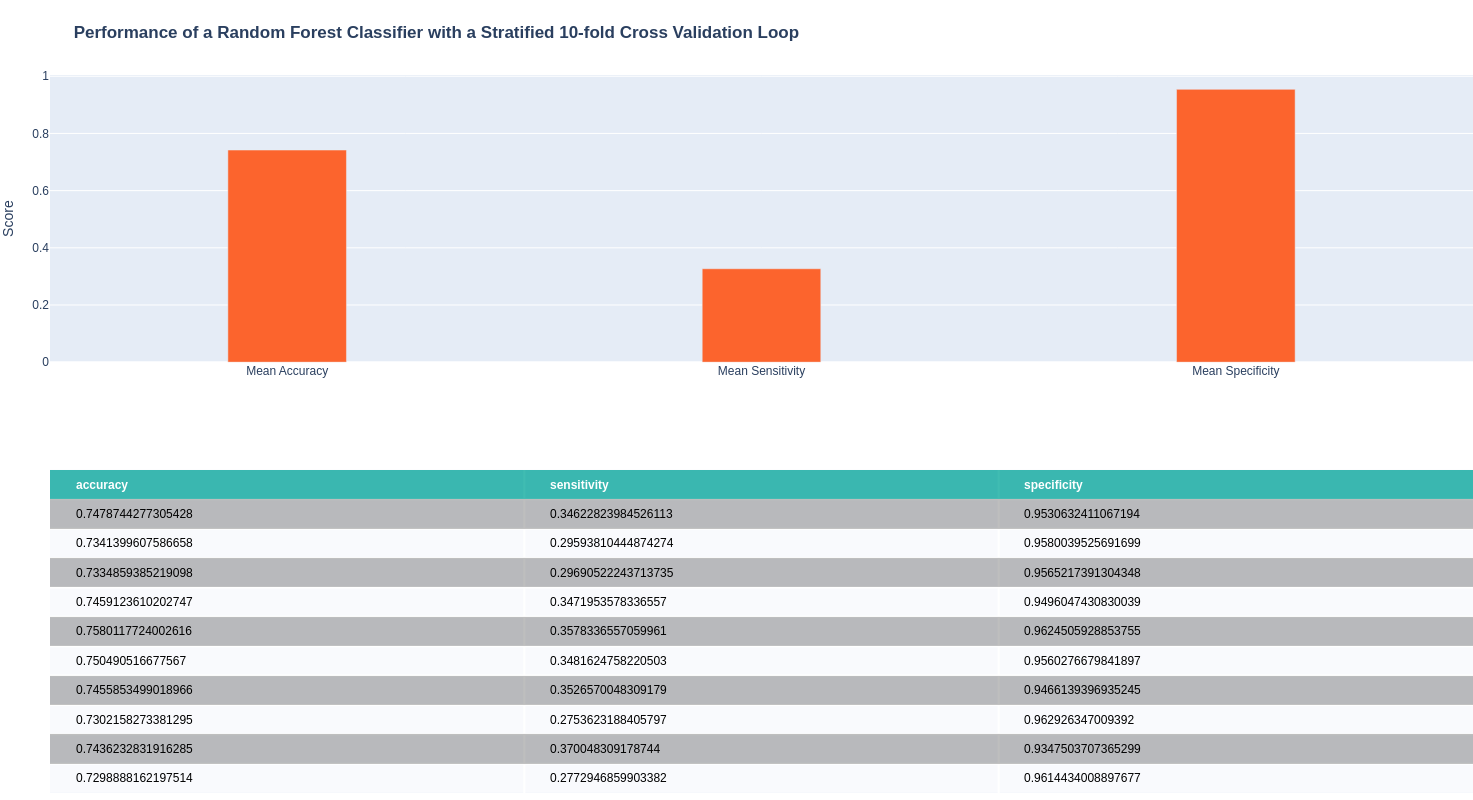

In [58]:
### random forest model with the stratified 10-fold cross validation loop
cellTitle = '<b>Performance of a Random Forest Classifier with a Stratified 10-fold Cross Validation Loop</b>'
from turtle import title
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# random forest takes in sparse matrices, so we will convert X into a matrix using scipy
X_mat = scipy.sparse.coo_matrix(X)
X_mat = X_mat.tocsr()

score = []
rf_clf = RandomForestClassifier(max_depth=10, random_state=1024,n_jobs=-1)
for train,test in skf.split(X_mat,y):
    rf_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = rf_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
#print(score)
#print('mean accuracy: ',score['accuracy'].mean(),
#     '\nmean sensitivity: ',score['sensitivity'].mean(),
#     '\nmean specificity: ',score['specificity'].mean())

rfFig = plotMetrics(score, cellTitle)
rfFig.show()

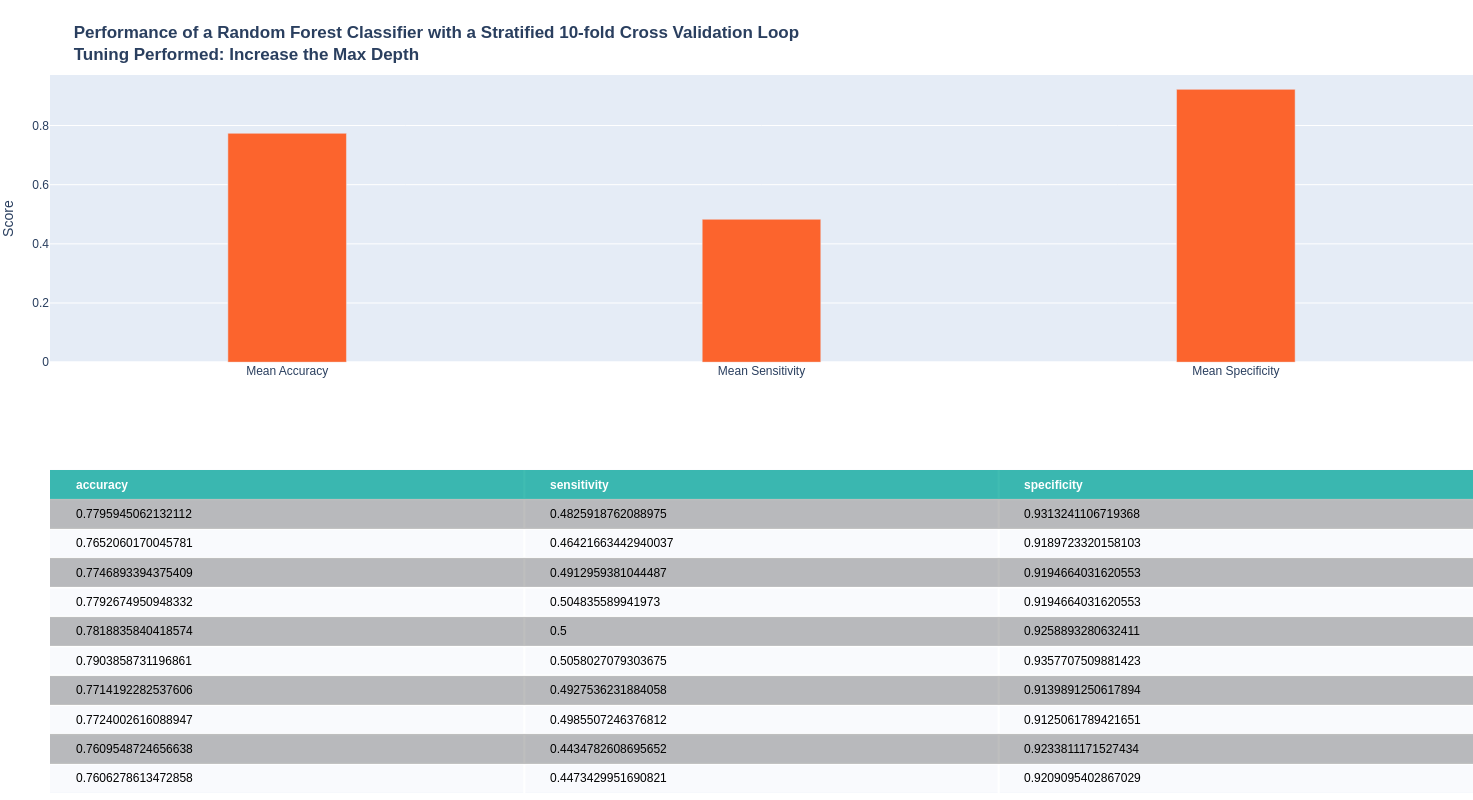

In [57]:
## repeat adjusting tuning parameters to achieve better results
# increasing max depth (largely increases complexity), 
cellTitle = '<b>Performance of a Random Forest Classifier with a Stratified 10-fold Cross Validation Loop<br>Tuning Performed: Increase the Max Depth</b>'
score = []
rf_clf = RandomForestClassifier(max_depth=15, random_state=1024, n_jobs=-1)
for train,test in skf.split(X_mat,y):
    rf_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = rf_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
rfFig = plotMetrics(score, cellTitle)
rfFig.show()

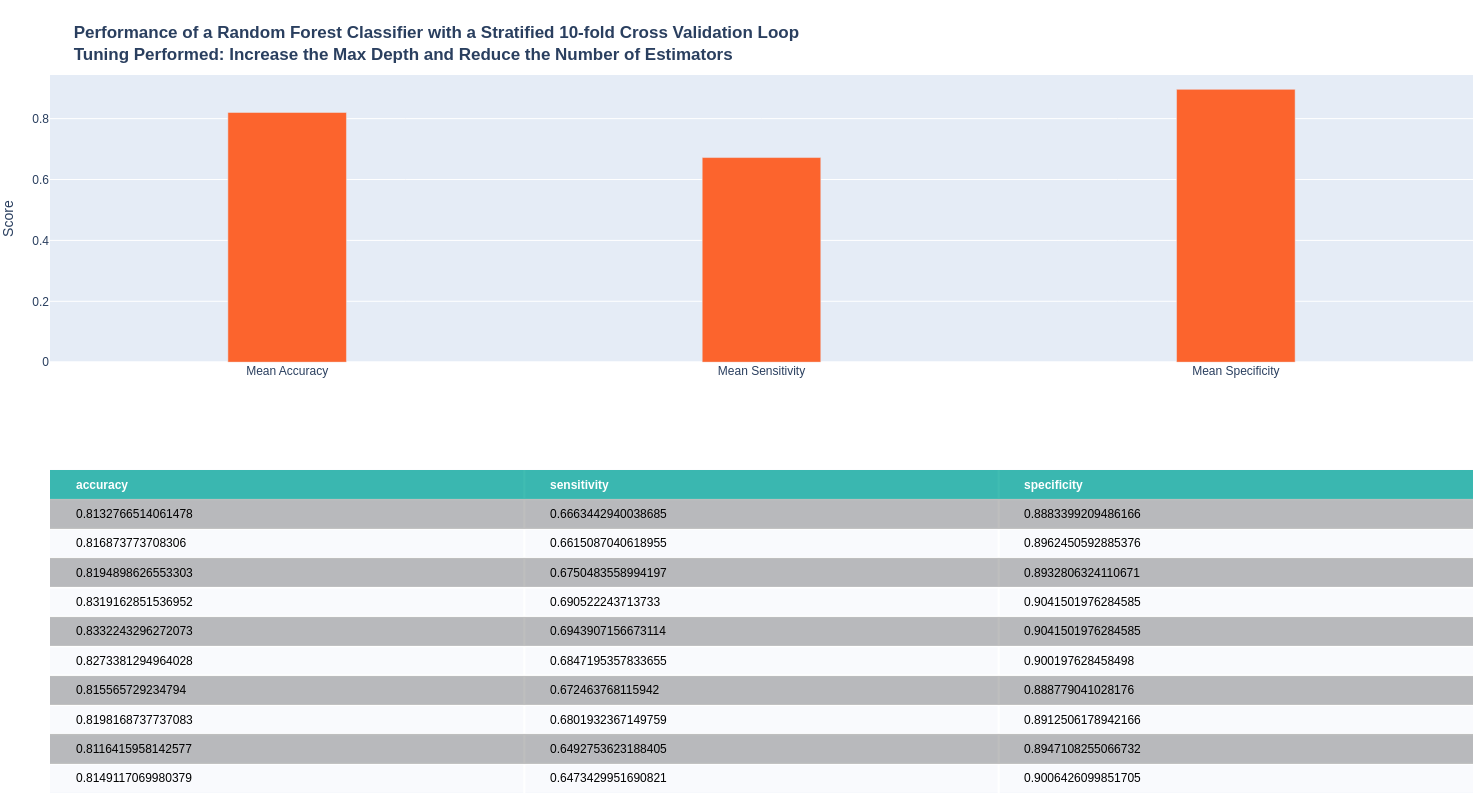

In [59]:
## increasing tree depth largely increases computational cost, so we will reduce the number of estimators to compensate and keep computing time reasonable
cellTitle = '<b>Performance of a Random Forest Classifier with a Stratified 10-fold Cross Validation Loop<br>Tuning Performed: Increase the Max Depth and Reduce the Number of Estimators</b>'
score = []
rf_clf = RandomForestClassifier(max_depth=150, n_estimators = 45,random_state=1024,n_jobs=-1, class_weight='balanced')
for train,test in skf.split(X_mat,y):
    rf_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = rf_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
rfFig = plotMetrics(score, cellTitle)
rfFig.show()

#### NaiveBayes

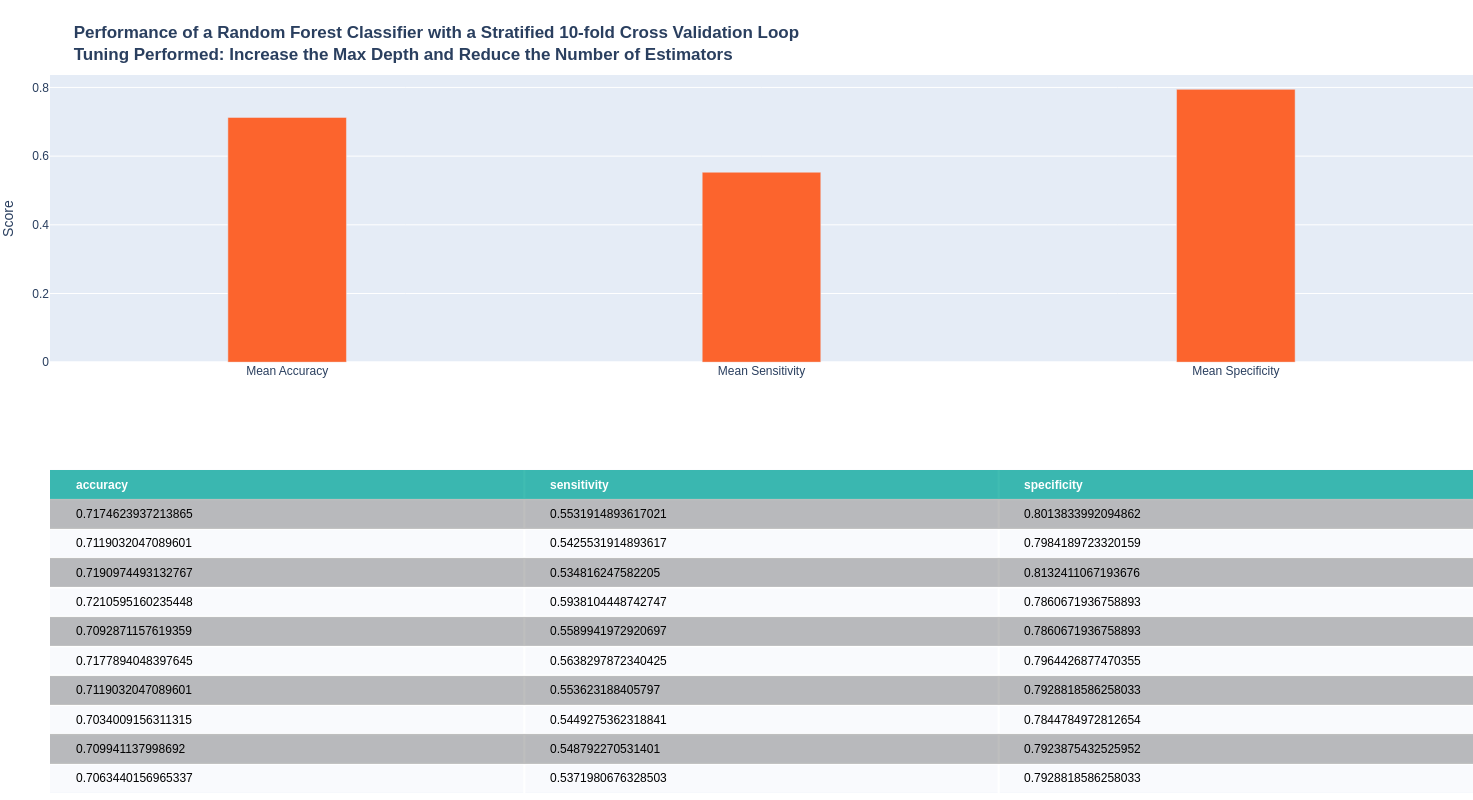

In [60]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()

score = []
for train,test in skf.split(X_mat,y):
    nb_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = nb_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat,labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
nbFig = plotMetrics(score, cellTitle)
nbFig.show()

In [40]:
### redoing NaiveBayes model
score = []
for train,test in skf.split(X_mat,y):
    for i in [.001,.25,.5,.75,.85,1]:
        for j in [.001,.002,.003,.005,.01]:
            nb_clf = BernoulliNB(alpha=i,binarize=j,fit_prior=False)
            nb_clf.fit(X_mat[train],y.values.ravel()[train])
            y_hat = nb_clf.predict(X_mat[test])

            cm = confusion_matrix(y.loc[test],y_hat,labels=[1,0])
            score.append({'alpha':i,'binarize':j,'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                    'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                    'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
score.groupby(['alpha','binarize']).mean().nlargest(n=3,columns = ['sensitivity'])

accuracy  sensitivity  specificity
alpha binarize                                    
0.50  0.001     0.681818     0.766631     0.638466
0.75  0.002     0.681458     0.766631     0.637922
      0.003     0.681458     0.766631     0.637922

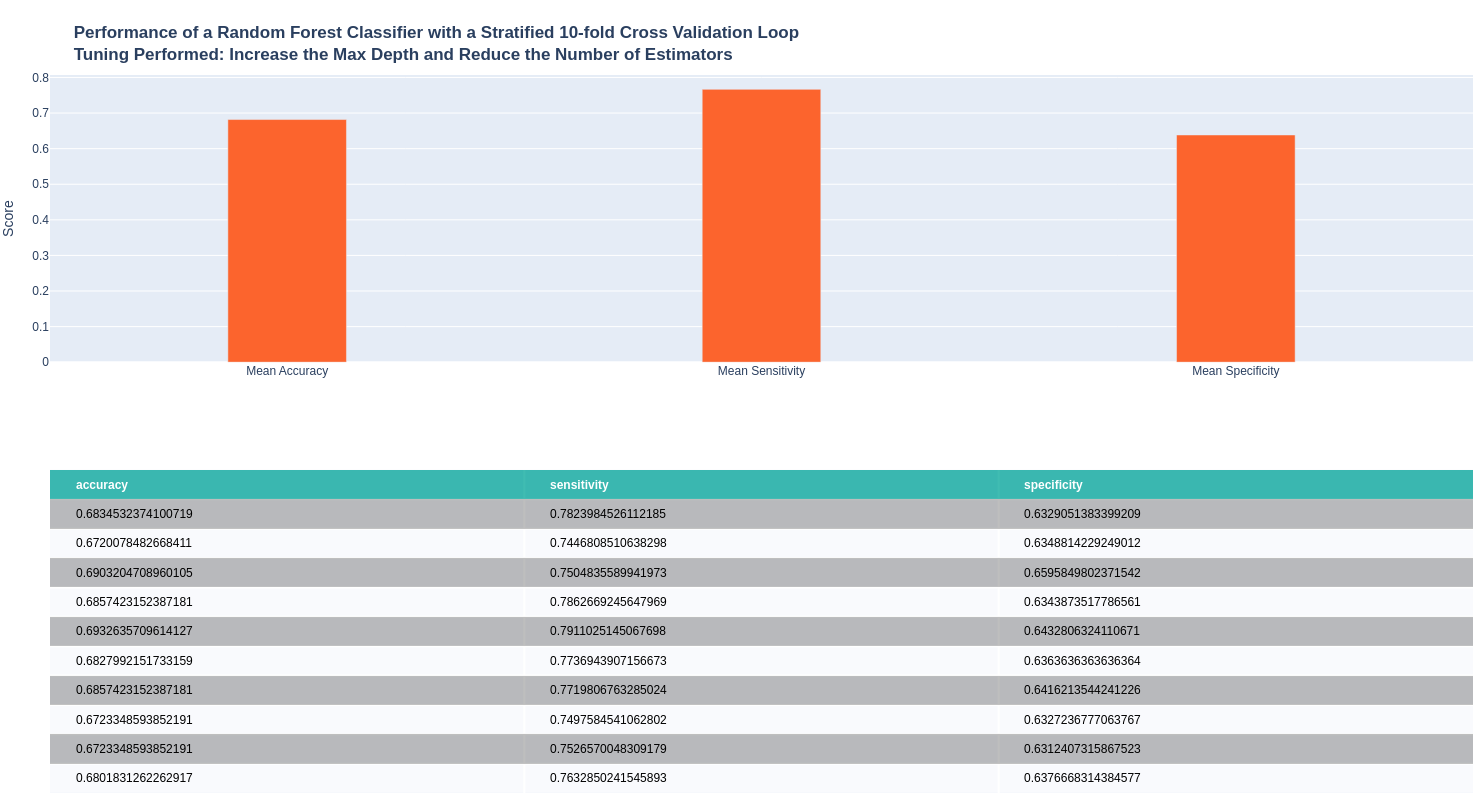

In [61]:
# fit model with alpha .5 and binarize .001 as found prior
score = []
nb_clf = BernoulliNB(alpha=.5,binarize=.001,fit_prior=False)
for train,test in skf.split(X_mat,y):
    nb_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = nb_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
nbFig = plotMetrics(score, cellTitle)
nbFig.show()

#### SVM

In [42]:
patch_sklearn()

from sklearn.svm import SVC

score = []
svm_clf = SVC(kernel='rbf', gamma='auto')
for train,test in skf.split(X_mat,y):
    svm_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = svm_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
score.mean()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


accuracy       0.706736
sensitivity    0.239949
specificity    0.945345
dtype: float64

In [43]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.svm import SVC
score = []
svm_clf = SVC(kernel='rbf', gamma='auto', cache_size=800,class_weight={0:34, 1:66})
for train,test in skf.split(X_mat,y):
    svm_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = svm_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
score.mean()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


accuracy       0.708077
sensitivity    0.787126
specificity    0.667671
dtype: float64

In [44]:
unpatch_sklearn()

#### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

lor_clf = LogisticRegression(random_state=1024,max_iter=400)
score = []
for train,test in skf.split(X_mat,y):
    lor_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = lor_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
print(score)
score.mean()

   accuracy  sensitivity  specificity
0  0.729562     0.451644     0.871542
1  0.721714     0.415861     0.877964
2  0.724657     0.417795     0.881423
3  0.733486     0.469052     0.868577
4  0.728581     0.439072     0.876482
5  0.732178     0.446809     0.877964
6  0.725965     0.428986     0.877904
7  0.734140     0.445411     0.881859
8  0.720733     0.417391     0.875927
9  0.715827     0.402899     0.875927


accuracy       0.726684
sensitivity    0.433492
specificity    0.876557
dtype: float64

In [46]:
## refit logistic regression model with parameter tuning
lor_clf = LogisticRegression(random_state=1024,max_iter=400,class_weight='balanced',C=.25)
score = []
for train,test in skf.split(X_mat,y):
    lor_clf.fit(X_mat[train],y.values.ravel()[train])
    y_hat = lor_clf.predict(X_mat[test])
    
    cm = confusion_matrix(y.loc[test],y_hat, labels=[1,0])
    score.append({'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
print(score)
score.mean()


   accuracy  sensitivity  specificity
0  0.678875     0.781431     0.626482
1  0.678875     0.758221     0.638340
2  0.684107     0.761122     0.644763
3  0.688685     0.794004     0.634881
4  0.685415     0.784333     0.634881
5  0.687377     0.780464     0.639822
6  0.684761     0.768116     0.642116
7  0.689012     0.795169     0.634701
8  0.676586     0.759420     0.634207
9  0.680837     0.763285     0.638655


accuracy       0.683453
sensitivity    0.774556
specificity    0.636885
dtype: float64

#### KNN

KNN Classifier - From sklearn.neighbors, we use the KNeighborsClassifier.  

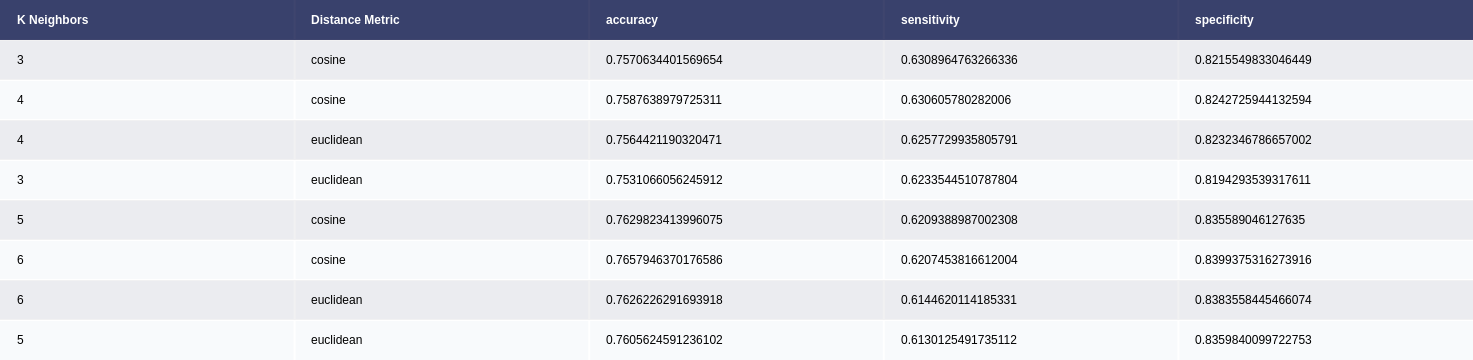

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

score = []

for train,test in skf.split(X_mat,y):
    for i in range(3,7):
        for j in ['euclidean','euclidean','cosine']: #'manhattan','euclidean','cosine'
            knn_clf = KNeighborsClassifier(n_neighbors=i,metric=j,n_jobs=-1, weights='distance')
            knn_clf.fit(X_mat[train],y.values.ravel()[train])
            y_hat = knn_clf.predict(X_mat[test])

            cm = confusion_matrix(y.loc[test],y_hat,labels=[1,0])
            score.append({'K Neighbors':i,'Distance Metric':j,'accuracy':(cm[0,0]+cm[1,1])/sum(cm.ravel()),
                    'sensitivity':cm[0,0]/(cm[0,0]+cm[0,1]),
                    'specificity':cm[1,1]/(cm[1,1]+cm[1,0])})
score = pd.DataFrame(score)
meanScores = score.groupby(['K Neighbors','Distance Metric']).mean().nlargest(n=10,columns = ['sensitivity']).reset_index()
fig2 = ff.create_table(meanScores)


fig2.show()


Best performance so far:
		accuracy	sensitivity	specificity
K Neighbors	Distance Metric		
3	manhattan	0.760530	0.628480	0.828029
    euclidean	0.744147	0.605857	0.814834
    cosine	0.746272	0.605180	0.818392
5	euclidean	0.747711	0.584012	0.831388
    cosine	0.745749	0.578114	0.831438
				
7	euclidean	0.747384	0.564679	0.840778
    cosine	0.747580	0.560714	0.843100
6	cosine	0.749313	0.467326	0.893456
    euclidean	0.748954	0.466744	0.893209
Euclidean K= 3 acc=.744147, sens = .605857, spec = .814834
Cosine K = 3 acc= .746272, sens = .605180, spec = .818392


## Modeling and Evaluation 4
Rubric (10 pts): Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

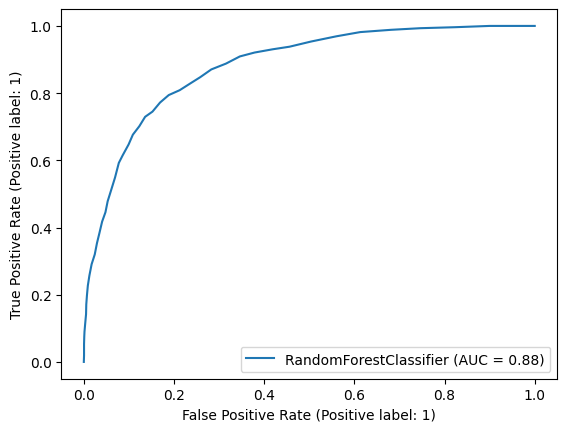

In [48]:
# ROC random forest, for the final product, we could plot all ROC curves under a single plot, leaving this in for now
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.RocCurveDisplay.from_estimator(rf_clf,X_mat[test],y.loc[test],pos_label=1)

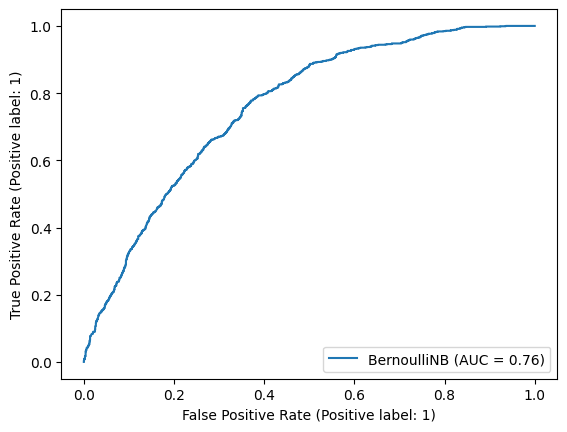

In [53]:
## NaiveBayes ROC
metrics.RocCurveDisplay.from_estimator(nb_clf,X_mat[test],y.loc[test],pos_label=1)

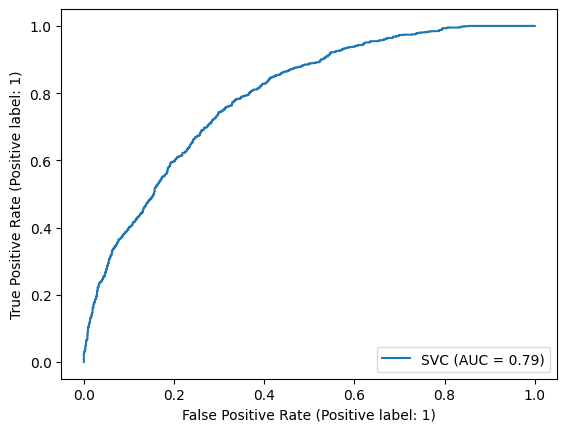

In [52]:
metrics.RocCurveDisplay.from_estimator(svm_clf,X_mat[test],y.loc[test],pos_label=1)

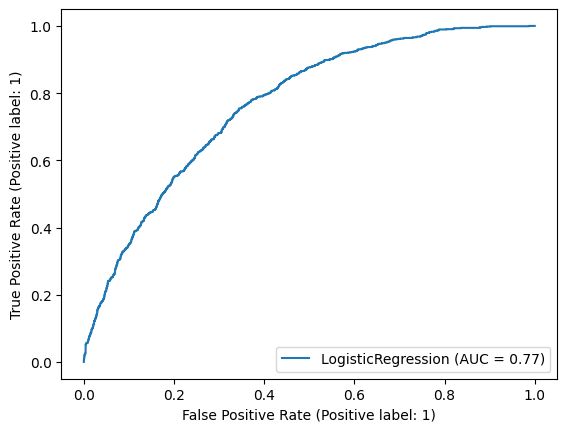

In [50]:
lor_clf = LogisticRegression(max_iter=400,C=.2)
lor_clf.fit(X_mat[train],y.values.ravel()[train])
metrics.RocCurveDisplay.from_estimator(lor_clf,X_mat[test],y.loc[test],pos_label=1)

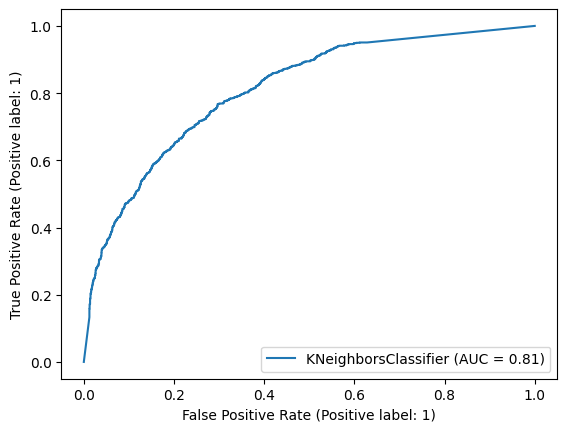

In [54]:
metrics.RocCurveDisplay.from_estimator(knn_clf,X_mat[test],y.loc[test],pos_label=1)

## Modeling and Evaluation 5
Rubric (10 pts): Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

## Modeling and Evaluation 6
Rubric (10 pts): Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

## Deployment
Rubric (5 pts): How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

## Exceptional Work
Rubric (10 pts): You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?


In [51]:
### thinking of doing 5 models instead of 3